In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import GridSearchCV

In [2]:
# load the the Boston House price data from Scikit-learn
data = pd.read_csv('image_bins_lungs2.csv')
data.head()

,filename,Bins0,Bins1,Bins2,Bins3,Bins4,Bins5,Bins6,Bins7,Class
0,transformed_image_covid_1.png,4722,15567,4,7683,12061,1,8864,16634,0
1,transformed_image_covid_2.png,6556,13701,25,9956,9437,0,12114,13747,0
2,transformed_image_covid_3.png,10512,12249,1,11502,7743,2,9619,13908,0
3,transformed_image_covid_4.png,7987,11854,2,10419,11895,9,11931,11439,0
4,transformed_image_covid_5.png,7761,14159,4,10898,10560,9,9153,12992,0


In [3]:
data = data.drop(['filename'], axis = 1)
data.head()

,Bins0,Bins1,Bins2,Bins3,Bins4,Bins5,Bins6,Bins7,Class
0,4722,15567,4,7683,12061,1,8864,16634,0
1,6556,13701,25,9956,9437,0,12114,13747,0
2,10512,12249,1,11502,7743,2,9619,13908,0
3,7987,11854,2,10419,11895,9,11931,11439,0
4,7761,14159,4,10898,10560,9,9153,12992,0


In [4]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('Class', axis=1), data['Class'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((1540, 8), (660, 8))

In [5]:
# example: build Regression tree using LSTAT to predict MEDV

tree_model = DecisionTreeRegressor(max_depth=3, random_state=0)

tree_model.fit(X_train['Bins0'].to_frame(), y_train)

X_train['Bins0_tree'] = tree_model.predict(X_train['Bins0'].to_frame())

X_train[['Bins0', 'Bins0_tree']].head(10)

,Bins0,Bins0_tree
52,8582,0.154506
1354,6455,0.728093
1655,7448,0.508065
360,5696,0.728093
1609,6460,0.728093
1670,6777,0.728093
823,8569,0.154506
159,5036,0.309859
1161,6009,0.728093
318,4701,0.309859


In [6]:
# let's explore how many end points (the bins) the tree created

X_train['Bins0_tree'].nunique()

8

In [7]:
# let's explore which end points (the predictions) the tree created

X_train['Bins0_tree'].unique()

array([0.15450644, 0.72809278, 0.50806452, 0.30985915, 0.40601504,
       0.27192982, 0.        , 0.06666667])

Text(0, 0.5, 'MEDV')

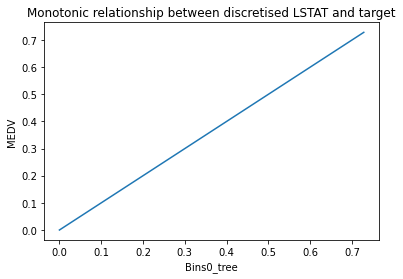

In [8]:
# monotonic relationship with target: train set

pd.concat([X_train, y_train], axis=1).groupby(['Bins0_tree'])['Class'].mean().plot()
plt.title('Monotonic relationship between discretised LSTAT and target')
plt.ylabel('MEDV')

Text(0, 0.5, 'Class')

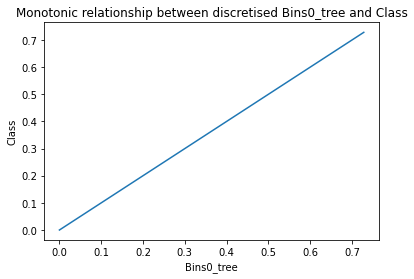

In [9]:
# monotonic relationship with target: test set

X_test['Bins0_tree'] = tree_model.predict(X_test['Bins0'].to_frame())

pd.concat([X_train, y_train], axis=1).groupby(['Bins0_tree'])['Class'].mean().plot()
plt.title('Monotonic relationship between discretised Bins0_tree and Class')
plt.ylabel('Class')

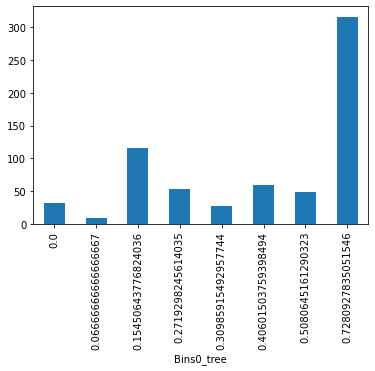

In [10]:
# plot number of observations per bin

X_test.groupby(['Bins0_tree'])['Bins0'].count().plot.bar()

In [11]:
data.head()

,Bins0,Bins1,Bins2,Bins3,Bins4,Bins5,Bins6,Bins7,Class
0,4722,15567,4,7683,12061,1,8864,16634,0
1,6556,13701,25,9956,9437,0,12114,13747,0
2,10512,12249,1,11502,7743,2,9619,13908,0
3,7987,11854,2,10419,11895,9,11931,11439,0
4,7761,14159,4,10898,10560,9,9153,12992,0


In [12]:
# example: build Regression tree using LSTAT to predict MEDV

tree_model = DecisionTreeRegressor(max_depth=3, random_state=0)

tree_model.fit(X_train['Bins1'].to_frame(), y_train)

X_train['Bins1_tree'] = tree_model.predict(X_train['Bins1'].to_frame())

X_train[['Bins1', 'Bins1_tree']].head(10)

,Bins1,Bins1_tree
52,14529,0.630996
1354,13132,0.630996
1655,13236,0.630996
360,13283,0.630996
1609,14773,0.630996
1670,10257,0.506936
823,13341,0.630996
159,11911,0.506936
1161,13942,0.630996
318,12962,0.506936


In [13]:
# let's explore how many end points (the bins) the tree created

X_train['Bins1_tree'].nunique()

7

Text(0, 0.5, 'Class')

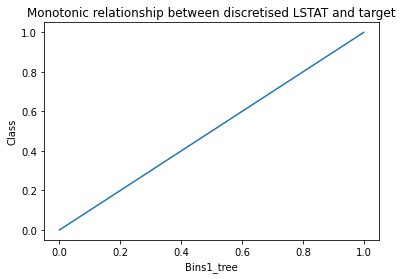

In [14]:
# monotonic relationship with target: train set

pd.concat([X_train, y_train], axis=1).groupby(['Bins1_tree'])['Class'].mean().plot()
plt.title('Monotonic relationship between discretised LSTAT and target')
plt.ylabel('Class')

In [15]:
X_train

,Bins0,Bins1,Bins2,Bins3,Bins4,Bins5,Bins6,Bins7,Bins0_tree,Bins1_tree
52,8582,14529,6,12127,7150,0,7062,16080,0.154506,0.630996
1354,6455,13132,0,11857,12682,0,6074,15336,0.728093,0.630996
1655,7448,13236,1,9635,12352,2,8770,14092,0.508065,0.630996
360,5696,13283,0,12704,11864,0,6762,15227,0.728093,0.630996
1609,6460,14773,3,9241,13771,0,7395,13893,0.728093,0.630996
...,...,...,...,...,...,...,...,...,...,...
1033,7778,11617,67,10570,10957,0,5334,19213,0.508065,0.506936
1731,6294,10413,0,11231,14792,0,7561,15245,0.728093,0.506936
763,8806,14943,0,12561,7401,0,6238,15587,0.154506,0.630996
835,14032,12117,2,13589,4487,2,7471,13836,0.000000,0.506936


In [16]:
# example: build Regression tree using LSTAT to predict MEDV

tree_model = DecisionTreeRegressor(max_depth=3, random_state=0)
tree_model.fit(X_train['Bins2'].to_frame(), y_train)
X_train['Bins2_tree'] = tree_model.predict(X_train['Bins2'].to_frame())
tree_model = DecisionTreeRegressor(max_depth=3, random_state=0)
tree_model.fit(X_train['Bins3'].to_frame(), y_train)
X_train['Bins3_tree'] = tree_model.predict(X_train['Bins3'].to_frame())
tree_model.fit(X_train['Bins4'].to_frame(), y_train)
X_train['Bins4_tree'] = tree_model.predict(X_train['Bins4'].to_frame())
tree_model.fit(X_train['Bins5'].to_frame(), y_train)
X_train['Bins5_tree'] = tree_model.predict(X_train['Bins5'].to_frame())
tree_model.fit(X_train['Bins6'].to_frame(), y_train)
X_train['Bins6_tree'] = tree_model.predict(X_train['Bins6'].to_frame())
tree_model.fit(X_train['Bins7'].to_frame(), y_train)
X_train['Bins7_tree'] = tree_model.predict(X_train['Bins7'].to_frame())

In [17]:
X_train = X_train.drop(['Bins0','Bins1','Bins2','Bins3','Bins4','Bins5','Bins6','Bins7'], axis=1)

In [18]:
X_train

,Bins0_tree,Bins1_tree,Bins2_tree,Bins3_tree,Bins4_tree,Bins5_tree,Bins6_tree,Bins7_tree
52,0.154506,0.630996,0.296296,0.521886,0.085561,0.601166,0.573529,0.293706
1354,0.728093,0.630996,0.628253,0.521886,0.686160,0.601166,0.372093,0.714797
1655,0.508065,0.630996,0.582222,0.660218,0.554622,0.127660,0.703552,0.714797
360,0.728093,0.630996,0.628253,0.313253,0.397213,0.601166,0.573529,0.714797
1609,0.728093,0.630996,0.484375,0.660218,0.686160,0.601166,0.703552,0.714797
...,...,...,...,...,...,...,...,...
1033,0.508065,0.506936,0.028169,0.660218,0.397213,0.601166,0.017241,0.007407
1731,0.728093,0.506936,0.628253,0.660218,0.686160,0.601166,0.703552,0.714797
763,0.154506,0.630996,0.628253,0.173913,0.085561,0.601166,0.372093,0.550000
835,0.000000,0.506936,0.489796,0.075472,0.085561,0.127660,0.703552,0.714797


In [19]:
tree_model = DecisionTreeRegressor(max_depth=3, random_state=0)
tree_model.fit(X_test['Bins1'].to_frame(), y_test)
X_test['Bins1_tree'] = tree_model.predict(X_test['Bins1'].to_frame())
tree_model.fit(X_test['Bins2'].to_frame(), y_test)
X_test['Bins2_tree'] = tree_model.predict(X_test['Bins2'].to_frame())
tree_model.fit(X_test['Bins3'].to_frame(), y_test)
X_test['Bins3_tree'] = tree_model.predict(X_test['Bins3'].to_frame())
tree_model.fit(X_test['Bins4'].to_frame(), y_test)
X_test['Bins4_tree'] = tree_model.predict(X_test['Bins4'].to_frame())
tree_model.fit(X_test['Bins5'].to_frame(), y_test)
X_test['Bins5_tree'] = tree_model.predict(X_test['Bins5'].to_frame())
tree_model.fit(X_test['Bins6'].to_frame(), y_test)
X_test['Bins6_tree'] = tree_model.predict(X_test['Bins6'].to_frame())
tree_model.fit(X_test['Bins7'].to_frame(), y_test)
X_test['Bins7_tree'] = tree_model.predict(X_test['Bins7'].to_frame())

In [20]:
X_test = X_test.drop(['Bins0','Bins1','Bins2','Bins3','Bins4','Bins5','Bins6','Bins7'], axis=1)

In [21]:
X_test

,Bins0_tree,Bins1_tree,Bins2_tree,Bins3_tree,Bins4_tree,Bins5_tree,Bins6_tree,Bins7_tree
1320,0.728093,0.518438,0.601671,0.641509,0.852459,0.60274,0.726994,0.742475
1367,0.309859,0.518438,0.601671,0.641509,0.852459,0.60274,0.435294,0.742475
1291,0.271930,0.518438,0.601671,0.641509,0.194175,0.60274,0.193548,0.363636
264,0.000000,0.518438,0.000000,0.000000,0.081395,0.60274,0.000000,0.000000
728,0.000000,0.518438,0.075000,0.256757,0.081395,0.60274,0.435294,0.000000
...,...,...,...,...,...,...,...,...
979,0.000000,0.000000,0.075000,0.176471,0.081395,0.60274,0.726994,0.000000
1689,0.728093,0.518438,0.601671,0.641509,0.468966,0.60274,0.355932,0.742475
1239,0.728093,0.518438,0.601671,0.641509,0.852459,0.60274,0.726994,0.742475
1769,0.728093,0.518438,0.679012,0.641509,0.468966,0.60274,0.726994,0.506944


In [22]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[281  51]
 [ 58 270]]


0.8348484848484848

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       332
           1       0.84      0.82      0.83       328

    accuracy                           0.83       660
   macro avg       0.84      0.83      0.83       660
weighted avg       0.83      0.83      0.83       660



In [25]:
from sklearn import svm, metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
print(confusion_matrix(y_test, y_pred))

print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))
print('F1 Score: {0:.3f}'.format(metrics.f1_score(y_test, y_pred)))
print('Sensitivity: {0:.3f}'.format(metrics.recall_score(y_test, y_pred)))
print('Precision: {0:.3f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: {0:.3f}'.format(metrics.recall_score(y_test, y_pred)))

[[281  51]
 [ 58 270]]
Accuracy: 0.835
F1 Score: 0.832
Sensitivity: 0.823
Precision: 0.841
Recall: 0.823


In [26]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 83.83 %
Standard Deviation: 2.57 %
